In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
import plotly.express as px
import csv

In [2]:
#read in the data


DecWk1_Data = pd.read_csv('Picker_DecWk1_data.csv')

### NIGHT SHIFT ###

In [3]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk1_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)


In [4]:
print(table_view)

Day_of_Week         1        2         3         4         5         6  \
user_name                                                                
Troy          8:03 AM  8:17 AM         0         0   8:16 AM   8:27 AM   
ben          10:09 PM        0  10:09 PM  10:18 PM         0         0   
damir         8:05 AM  6:27 AM         0   7:42 AM   8:07 AM   6:52 AM   
davidm       10:11 PM        0         0         0         0  10:15 PM   
gregory             0        0   9:42 PM  10:13 PM  10:13 PM  10:16 PM   
hincho              0        0         0         0  10:33 AM         0   
jackr         4:32 AM        0         0   7:41 AM   5:08 AM         0   
jessek        4:35 AM        0   4:27 AM         0   7:35 AM         0   
justin        7:52 PM        0         0         0         0   7:55 PM   
kane          7:04 AM  6:56 AM         0   7:03 AM   7:05 AM   6:58 AM   
lachlyn       5:43 AM  6:45 AM   5:24 AM   6:55 AM         0   8:10 AM   
levi          8:30 PM        0   8:05 

I have the start times in a table and now lets look at individual time blocks of users starting with Night Shift 

In [4]:
Night_shift = ['levi', 'ben', 'davidm', 'gregory', 'tim', 'steve']
desired_days = [1,3,4,5,6,7] 

Days 1,3,4,5,6,7 are the days Night Shift worked, Day 2 was a Friday, meaning Night Shift do not work that night. I have chosen to leave Mick out as he only has 1 hour picked average 
in a week and skews the results. He is also not a 'picker' and is a supervisor. 

In [5]:
filtered_data = DecWk1_Data[
    (DecWk1_Data['user_name'].isin(Night_shift))&
    (DecWk1_Data['Day_of_Week'].isin(desired_days))]

In [6]:
table_view_Start = filtered_data.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1:'Thurs 30th', 3: 'Sun 3rd', 4: 'Mon 4th', 5: 'Tues 5th', 6: 'Wed 6th ', 7: 'Thur 7th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')

print(table_view_Start)

Days             Thurs 30th   Sun 3rd   Mon 4th  Tues 5th  Wed 6th   Thur 7th
Users Start Time                                                             
ben                10:09 PM  10:09 PM  10:18 PM         0         0         0
davidm             10:11 PM         0         0         0  10:15 PM  10:05 PM
gregory                   0   9:42 PM  10:13 PM  10:13 PM  10:16 PM   9:41 PM
levi                8:30 PM   8:05 PM  10:11 PM  10:22 PM  10:17 PM   8:19 PM
steve               8:25 PM         0         0         0         0         0
tim                10:22 PM         0         0  10:20 PM  10:21 PM  10:13 PM


The table shows for the week the start time for the first picks of the night for the Night Shift. Some interesting data points in these for the first week of December. 

*The below assumes that an acceptable first pick start is 5 minutes past scheduled start time*. 

**Steve** appears to have taken the week off starting Sunday 3rd, however, started his first pick on Thursday at 8:25pm, 20 minutes after his starting time. This could be due to him having to set up the anteroom and get pallets/crates down aisles. More investigation would be necessary. 

**Levi** has late starts everyday. Thursday it is possible he was helping set up the anteroom with Steve as they have similar start times. Sunday he was on time, but instantly started signing into picks late throughout the week, with his latest start (outside of Thursday 30th) being 17 minutes after scheduled start time. 

**Tim** has late starts each day due to him being a replenisher and he does not get assigned a pick instantly while he sets himself up with the equipment before getting started. 

**Ben** Took 3 days off this week and had his latest sign in at 13 minutes past scheduled, with 2 days being 4 minutes late. 

**David** was only late to sign in 2 days, and was away for 3 days of the week as well. His latest sign in was 10 minutes past.

**Gregory** was away Thursday 30th and has some curious start times on Sunday 3rd and Thursday 7th. He is scheduled to start at 10, but started 20 minutes earlier. Every other day he consistently is startiing approximately 10 minutes late. More investigation into why he started 20 minutes early on those 2 days is needed. 

Overall for Night shift for Week 1 of December 2023, there was over 1.5 hrs of downtime due to picks starting late. Levi being the worst offender, followed by Gregory (for this week). Lets follow this up with some last pick completed time data




In [7]:
table_view_End = filtered_data.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1:'Thurs 30th', 3: 'Sun 3rd', 4: 'Mon 4th', 5: 'Tues 5th', 6: 'Wed 6th ', 7: 'Thur 7th'})

# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')
print(table_view_End)

Days           Thurs 30th  Sun 3rd  Mon 4th Tues 5th Wed 6th  Thur 7th
Users End Time                                                        
ben               6:19 AM  5:54 AM  5:55 AM        0        0        0
davidm           11:02 PM        0        0        0  5:04 AM  5:26 AM
gregory                 0  4:59 AM  5:43 AM  5:35 AM  5:03 AM  5:56 AM
levi              1:42 AM  5:45 AM  5:52 AM  5:43 AM  4:21 AM  3:47 AM
steve             3:08 AM        0        0        0        0        0
tim               6:00 AM        0        0  5:15 AM  5:04 AM  5:53 AM


This table shows the times of the last picks completed by Night shift and just looking at the unusual timings.

**Steve** Steve finished his last pick at 3:08am on Thursday 30th, indicating he was assigned to building the P1s for that day and was off sick for the rest of the week. 

**Levi** I am unsure what happened on Thursday 30th for Levi, he stopped picking at 1:42am, potentially he had to help Hincho consolidate on the dock. 

**David** had his last pick on the Thursday 30th at 11pm and the 3 days off suggesting he left early due to illness. 

Everyone else has relatively stable end times except for **Ben** on Thursday 30th, he finished at 6:19am. If Steve or Levi had of started their picks at their scheduled start time this OT could potentially have been avoided

Lets look at average items/hr (shift) across the week. 


In [8]:
avg_items_per_hour = filtered_data.groupby('user_name')['Items/hr(Shift)'].mean()

#print(avg_items_per_hour)

avg_lines_per_hour = filtered_data.groupby('user_name')['Lines/hr(Shift)'].mean()

#print(avg_lines_per_hour)

avg_hours_picking = filtered_data.groupby('user_name')['Hours_Picking'].mean()

#print(avg_hours_picking)

In [9]:
min_items_per_hour = filtered_data.groupby('user_name')['Items/hr(Shift)'].min()

min_lines_per_hour = filtered_data.groupby('user_name')['Lines/hr(Shift)'].min()

min_hours_picking = filtered_data.groupby('user_name')['Hours_Picking'].min()

#print(min_items_per_hour)
#print(min_lines_per_hour)
#print(min_hours_picking)


In [10]:
max_items_per_hour = filtered_data.groupby('user_name')['Items/hr(Shift)'].max()

max_lines_per_hour = filtered_data.groupby('user_name')['Lines/hr(Shift)'].max()

max_hours_picking = filtered_data.groupby('user_name')['Hours_Picking'].max()

#print(max_items_per_hour)
#print(max_lines_per_hour)
#print(max_hours_picking)


In [11]:
Night_Stats = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking,
    'Min Items/Hr':min_items_per_hour,
    'Min Lines/Hr':min_lines_per_hour,
    'Min Hours Picking':min_hours_picking,
    'Max Items/Hr':max_items_per_hour,
    'Max Lines/Hr':max_lines_per_hour,
    'Max Hours Picking':max_hours_picking
}

df_night_stats = pd.DataFrame(Night_Stats)
# Specify the file path where you want to save the CSV file
file_path_Night_Stats = 'Night_Stats_Wk1.csv'

# Export the DataFrame to a CSV file
df_night_stats.to_csv(file_path_Night_Stats)

<Figure size 1000x600 with 0 Axes>

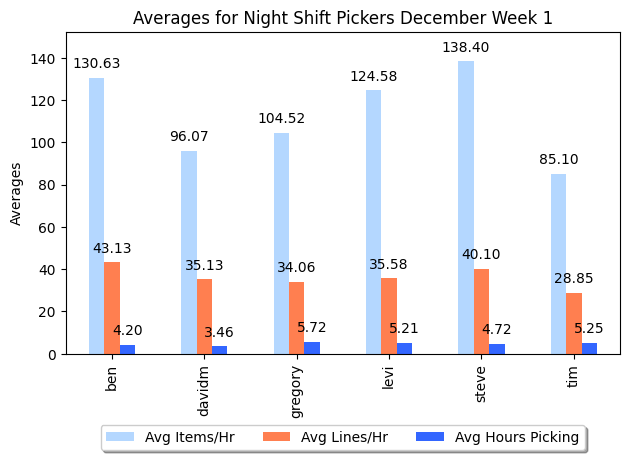

<Figure size 1000x600 with 0 Axes>

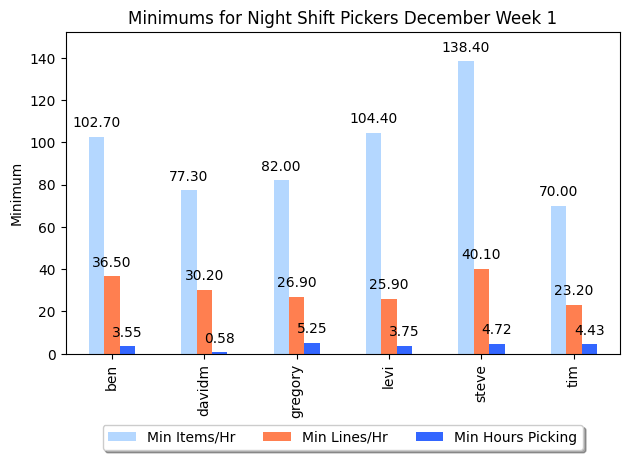

<Figure size 1000x600 with 0 Axes>

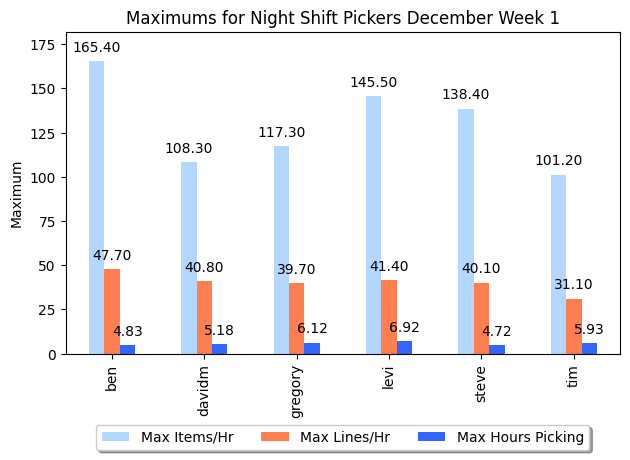

In [12]:
#create a dataframe with the averages 

data_averages = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking
}

# Creating a DataFrame from the calculated averages
df = pd.DataFrame(data_averages)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Night Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



#create a dataframe with the minimum

data_minimum = {
    'Min Items/Hr': min_items_per_hour,
    'Min Lines/Hr': min_lines_per_hour,
    'Min Hours Picking': min_hours_picking
}

# Creating a DataFrame from the calculated averages
df_min = pd.DataFrame(data_minimum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Night Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum = {
    'Max Items/Hr': max_items_per_hour,
    'Max Lines/Hr': max_lines_per_hour,
    'Max Hours Picking': max_hours_picking
}

# Creating a DataFrame from the calculated averages
df_max= pd.DataFrame(data_maximum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Night Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



**Averages for Night Shift Pickers Week 1** 

These averages take into account days off as they are given a value of '0', meaning they do not contribute to the score. These are only reflective of time spent at work on the pick. These are 
only looking at the averages for Lines/hr and items/hr over the course of the shift and not while they are picking. The reason for this is to get a full picture of how an employee works across the shift 
and not just when they are on the pick. This is so we can see if someone is wasting time or not using their time correctly. If someone is picking 300 lines/hr on the pick, this can be inflated by 1 line picks that are completed in 1 minute. Whereas, over the course of the shift those types of picks do not have as much direct impact on their overall performance. 


**Ben**: <br>
Average Items/hr: 130.63 <br>
Average Lines/hr: 43.13<br>
Average hours picking: 4.20<br>
**David**<br>
Average Items/hr: 96.07<br>
Average Lines/hr: 35.13<br>
Average hours picking: 3.46<br>
**Gregory**<br>
Average Items/hr: 104.52<br>
Average Lines/hr: 34.06<br>
Average hours picking: 5.72<br>
**Levi**<br>
Average Items/hr: 124.58<br>
Average Lines/hr: 35.58<br>
Average hours picking: 5.21<br>
**Steve**<br>
Average Items/hr: 138.40<br>
Average Lines/hr: 40.10<br>
Average hours picking: 4.72<br>
**Tim**<br>
Average Items/hr: 85.10<br>
Average Lines/hr: 28.85<br>
Average hours picking: 5.25<br>

In [21]:
# Specify the file path where you want to save the CSV file
file_path_averages = 'NSdata_averagesWk1.csv'

# Export the DataFrame to a CSV file
df.to_csv(file_path_averages)

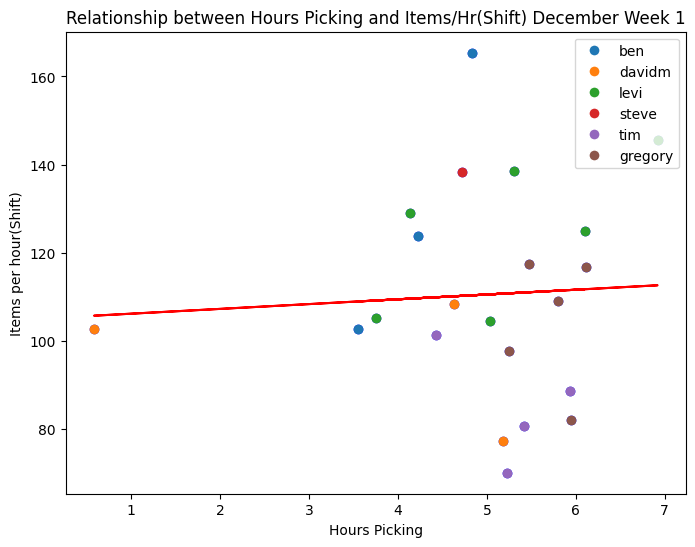

In [13]:
user_names = filtered_data['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Hours_Picking'], filtered_data['Items/hr(Shift)'], color='blue')

x = filtered_data['Hours_Picking']
y = filtered_data['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) December Week 1')
plt.show()

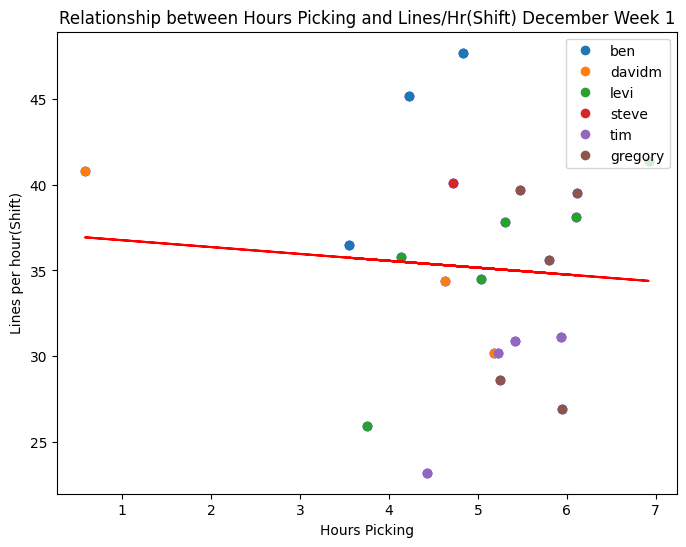

In [14]:
user_names = filtered_data['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Hours_Picking'], filtered_data['Lines/hr(Shift)'], color='blue')

#calculate trend line

x = filtered_data['Hours_Picking']
y = filtered_data['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)


plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='upper right')


plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) December Week 1')
plt.show()

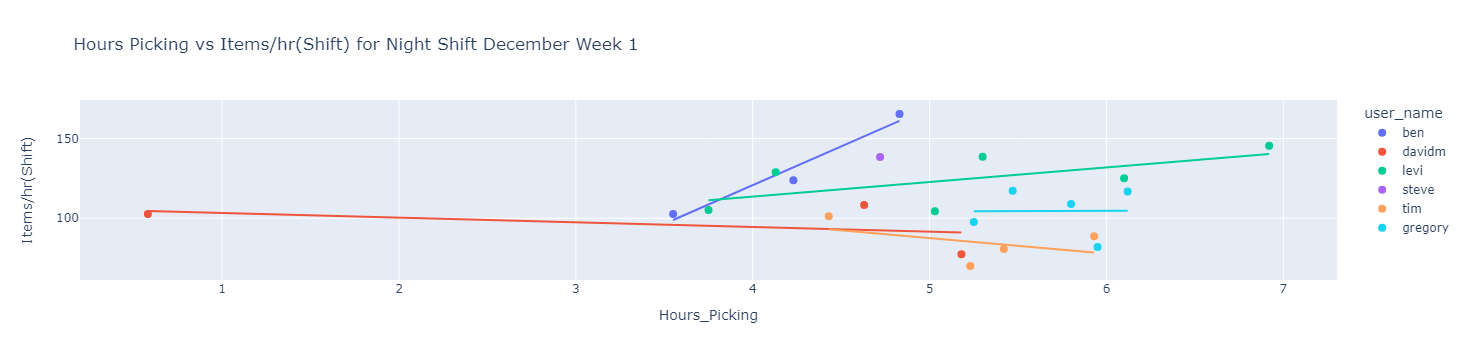

In [16]:

fig = px.scatter(filtered_data, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 title='Hours Picking vs Items/hr(Shift) for Night Shift December Week 1')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

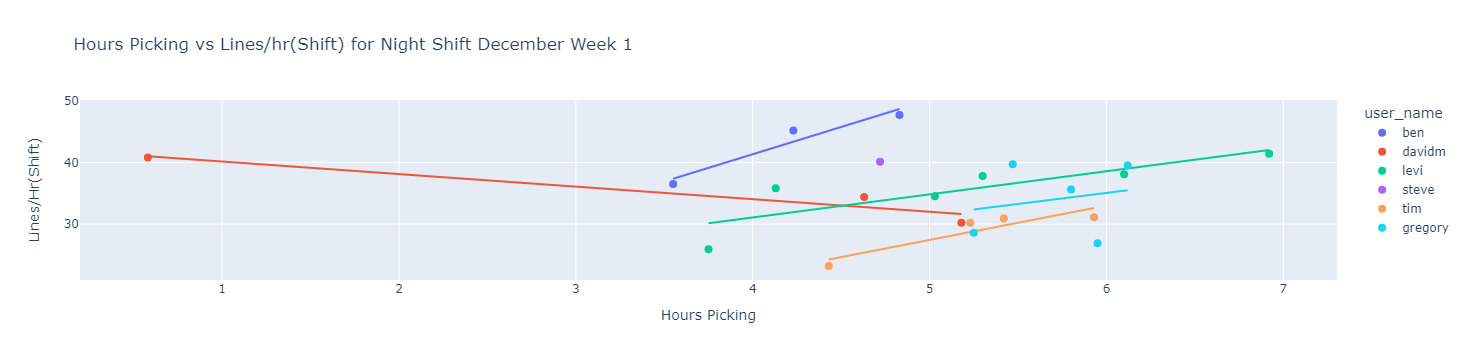

In [17]:
fig = px.scatter(filtered_data, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 1')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

/tmp/ipykernel_802/3604049252.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)


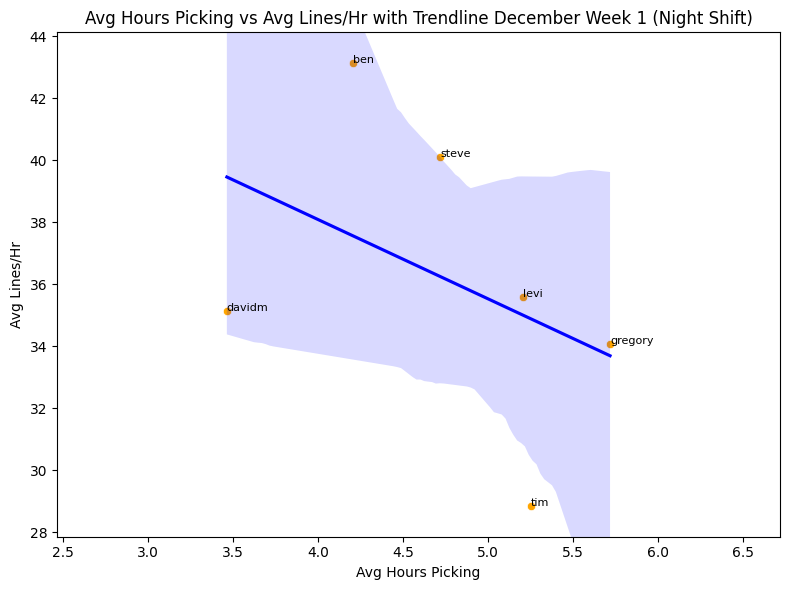

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Lines/Hr'].min() - 1, df_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 1 (Night Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_793/703122655.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)


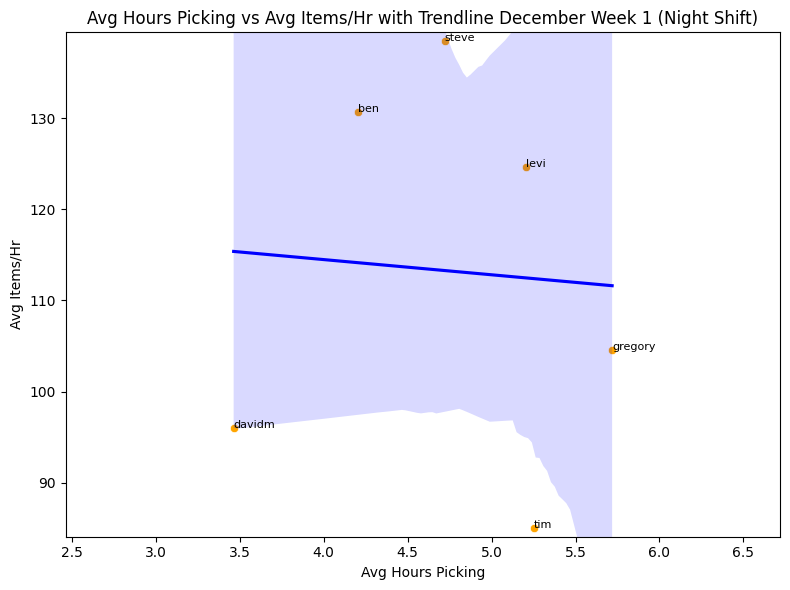

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Items/Hr'].min() - 1, df_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Items/Hr with Trendline December Week 1 (Night Shift)')
plt.tight_layout()
plt.show()


### Night Shift Notes ###

**Gregory** 

### DAY SHIFT ###

In [19]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk1_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)


In [20]:
#print(table_view)

In [3]:
Day_shift = ['Troy', 'damir', 'jackr', 'jessek','justin','kane', 'lachlyn','simonb','spiro']
desired_days = [1,2,3,4,5,6,7,8] 

In [4]:
filtered_data_Day = DecWk1_Data[
    (DecWk1_Data['user_name'].isin(Day_shift))&
    (DecWk1_Data['Day_of_Week'].isin(desired_days))]

In [5]:
table_view_Start = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1:'Thurs 30th', 2: 'Fri 1st',3: 'Sun 3rd', 4: 'Mon 4th', 5: 'Tues 5th', 6: 'Wed 6th ', 7: 'Thur 7th', 8: 'Fri 8th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')
print(table_view_Start)

Days             Thurs 30th  Fri 1st  Sun 3rd  Mon 4th Tues 5th Wed 6th   \
Users Start Time                                                           
Troy                8:03 AM  8:17 AM        0        0  8:16 AM  8:27 AM   
damir               8:05 AM  6:27 AM        0  7:42 AM  8:07 AM  6:52 AM   
jackr               4:32 AM        0        0  7:41 AM  5:08 AM        0   
jessek              4:35 AM        0  4:27 AM        0  7:35 AM        0   
justin              7:52 PM        0        0        0        0  7:55 PM   
kane                7:04 AM  6:56 AM        0  7:03 AM  7:05 AM  6:58 AM   
lachlyn             5:43 AM  6:45 AM  5:24 AM  6:55 AM        0  8:10 AM   
simonb                    0        0        0        0  7:30 AM        0   
spiro                     0        0        0        0  7:38 AM        0   

Days              Thur 7th  Fri 8th  
Users Start Time                     
Troy                     0        0  
damir              8:09 AM  8:06 AM  
jackr      

In [6]:
table_view_End = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1:'Thurs 30th', 2: 'Fri 1st',3: 'Sun 3rd', 4: 'Mon 4th', 5: 'Tues 5th', 6: 'Wed 6th ', 7: 'Thur 7th', 8: 'Fri 8th'})

# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')
print(table_view_End)

Days           Thurs 30th   Fri 1st  Sun 3rd  Mon 4th  Tues 5th  Wed 6th   \
Users End Time                                                              
Troy              1:51 PM   4:10 PM        0        0   3:52 PM   3:36 PM   
damir             6:23 AM  11:28 AM        0  3:40 PM   6:34 AM   2:48 PM   
jackr             5:56 AM         0        0  8:15 AM   5:37 AM         0   
jessek            6:48 AM         0  6:35 AM        0   5:34 AM         0   
justin            9:59 PM         0        0        0         0  10:07 PM   
kane             10:32 AM   2:47 PM        0  2:22 PM  10:51 AM   2:38 PM   
lachlyn           6:00 AM   2:52 PM  6:43 AM  1:33 PM         0   3:59 PM   
simonb                  0         0        0        0   9:31 AM         0   
spiro                   0         0        0        0   5:16 AM         0   

Days            Thur 7th  Fri 8th  
Users End Time                     
Troy                   0        0  
damir            6:23 PM  5:33 PM  
jackr   

In [7]:
avg_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].mean()

#print(avg_items_per_hour_day)


avg_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].mean()

#print(avg_lines_per_hour_day)


avg_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].mean()

#print(avg_hours_picking_day)

In [8]:
min_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].min()

min_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].min()

min_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].min()

#print(min_items_per_hour_day)
#print(min_lines_per_hour_day)
#print(min_hours_picking_day)

In [9]:
max_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].max()

max_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].max()

max_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].max()

#print(max_items_per_hour_day)
#print(max_lines_per_hour_day)
#print(max_hours_picking_day)


In [10]:
Day_Stats = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day,
    'Min Items/Hr':min_items_per_hour_day,
    'Min Lines/Hr':min_lines_per_hour_day,
    'Min Hours Picking':min_hours_picking_day,
    'Max Items/Hr':max_items_per_hour_day,
    'Max Lines/Hr':max_lines_per_hour_day,
    'Max Hours Picking':max_hours_picking_day
}

df_day_stats = pd.DataFrame(Day_Stats)
# Specify the file path where you want to save the CSV file
file_path_Day_Stats = 'Day_Stats_Wk1.csv'

# Export the DataFrame to a CSV file
df_day_stats.to_csv(file_path_Day_Stats)

<Figure size 1000x600 with 0 Axes>

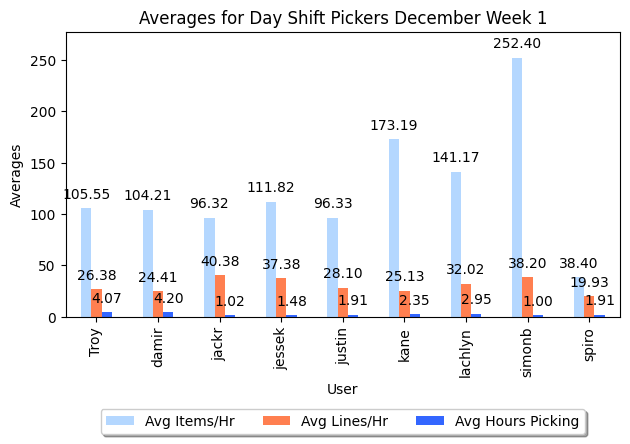

<Figure size 1000x600 with 0 Axes>

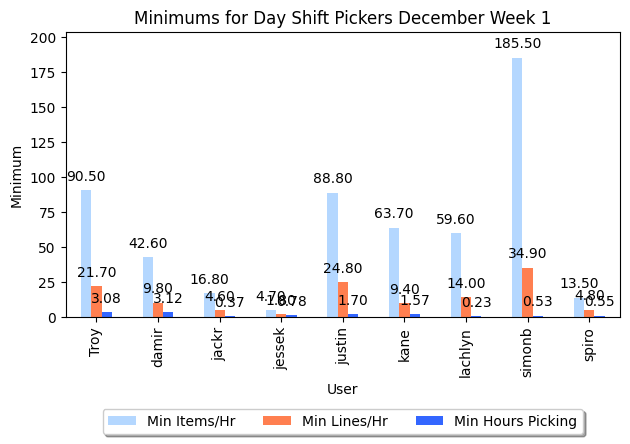

<Figure size 1000x600 with 0 Axes>

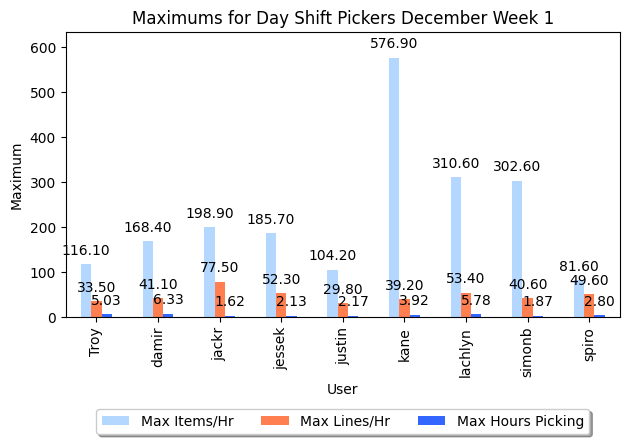

In [12]:
#create a dataframe with the averages 

data_averages_day = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_day = pd.DataFrame(data_averages_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Day Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the minimum

data_minimum_day = {
    'Min Items/Hr': min_items_per_hour_day,
    'Min Lines/Hr': min_lines_per_hour_day,
    'Min Hours Picking': min_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_min_day = pd.DataFrame(data_minimum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Day Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum_day = {
    'Max Items/Hr': max_items_per_hour_day,
    'Max Lines/Hr': max_lines_per_hour_day,
    'Max Hours Picking': max_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_max_day= pd.DataFrame(data_maximum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Day Shift Pickers December Week 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()

In [68]:
# Specify the file path where you want to save the CSV file
file_path_averages_day = 'DSdata_averagesWk1.csv'

# Export the DataFrame to a CSV file
df_day.to_csv(file_path_averages_day)

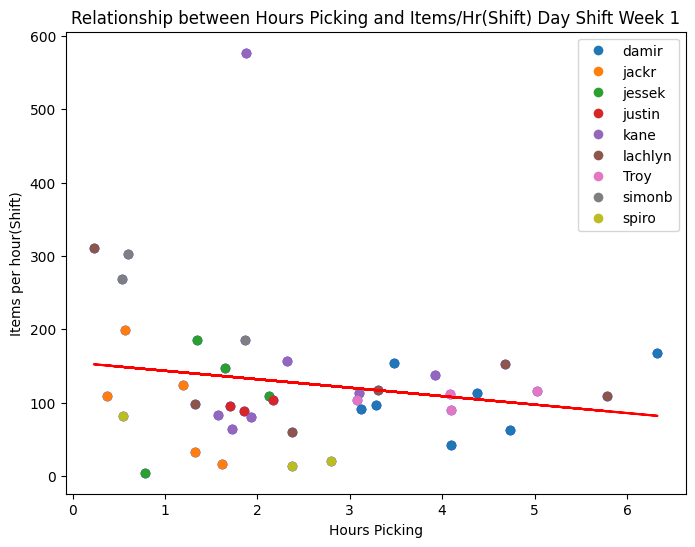

In [39]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Items/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Day Shift Week 1')
plt.show()

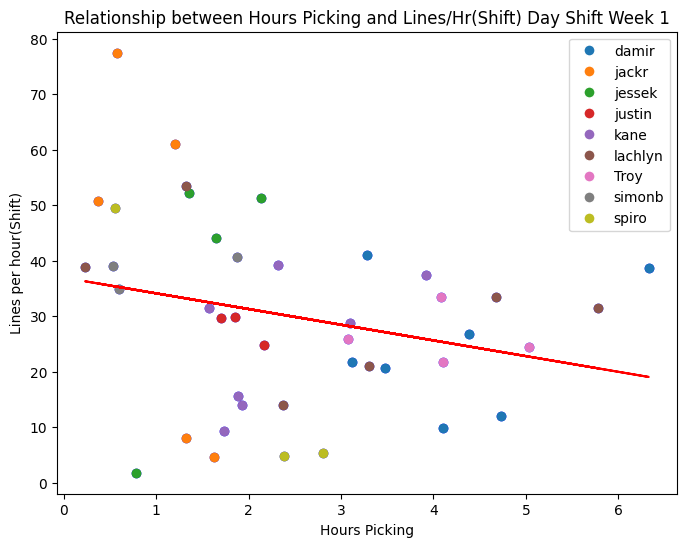

In [40]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Lines/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) Day Shift Week 1')
plt.show()

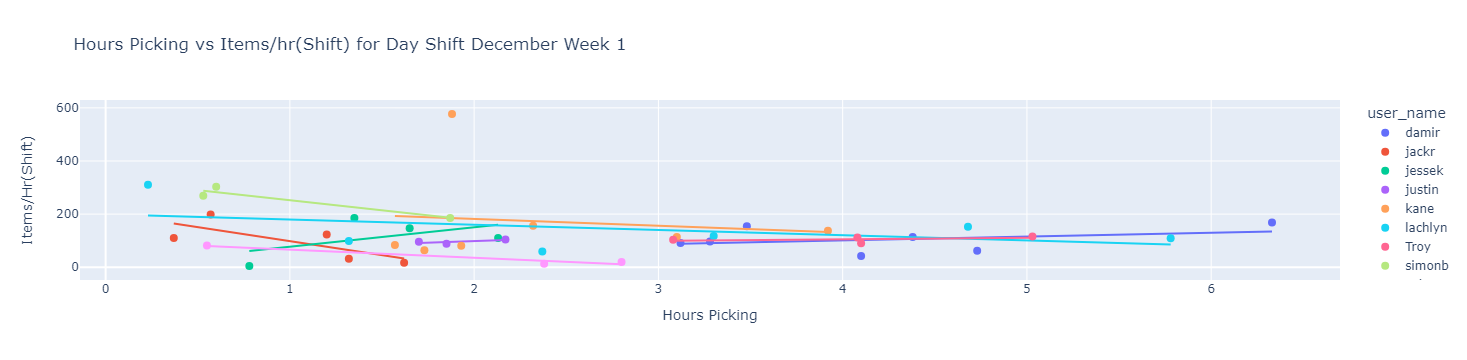

In [41]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Items/hr(Shift)' : 'Items/Hr(Shift)'},
                 title='Hours Picking vs Items/hr(Shift) for Day Shift December Week 1')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

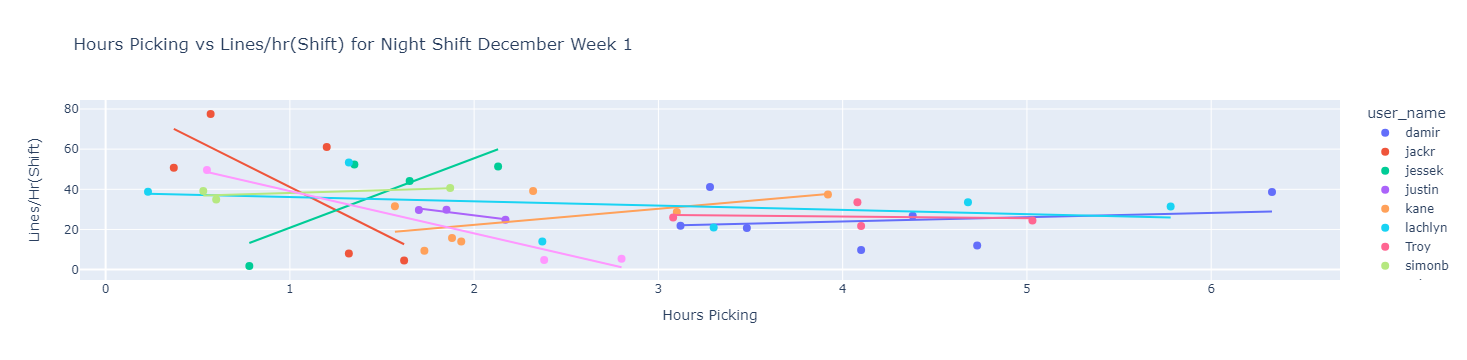

In [42]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 1')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

### Day shift notes ###
Interestingly, **Justin** appears to have a problem as his hours of picking go up, his items/hr(shift) go up, but his lines/hr(shift) go down, indicating that when given picks that have 
more items per line he struggles to keep pace. <br> **Kane** appears to have the opposite problem. He starts off picking high items/hr(shift) before dropping down slowly overtime. His lines/hr(Shift) however, go up overtime. This is potentially a problem, as it could indicate a slow start to the day and then working harder toward the end to meet deadline, dragging out his pick time unnecessarily. <br> **Damir** has one of the best performances on days, with steady items and lines/hr(shift) increase with the most hours picked in a day. <br> **Troy** has a similar problem to Justin, it would appear he is losing time picking lines when his item count increases. <br>**Lachlyn** experiences one of the sharpest declines of performance throughout the day as hours picking increases with a steep drop of items/hr(shift) and a small, but steady drop of lines/hr(shift). <br> **Owen**, **Simonb** & **Spiro**, are filler pickers. Simon is the best consistent performer as a filler, spends his hours picking efficiently, with the highest lines/hr and items/hr. Owen doesn't have enough time on the pick for a real picture. Spiro drops off extremely fast after the first hour of picking in both lines and items. 



/tmp/ipykernel_799/1947171485.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)


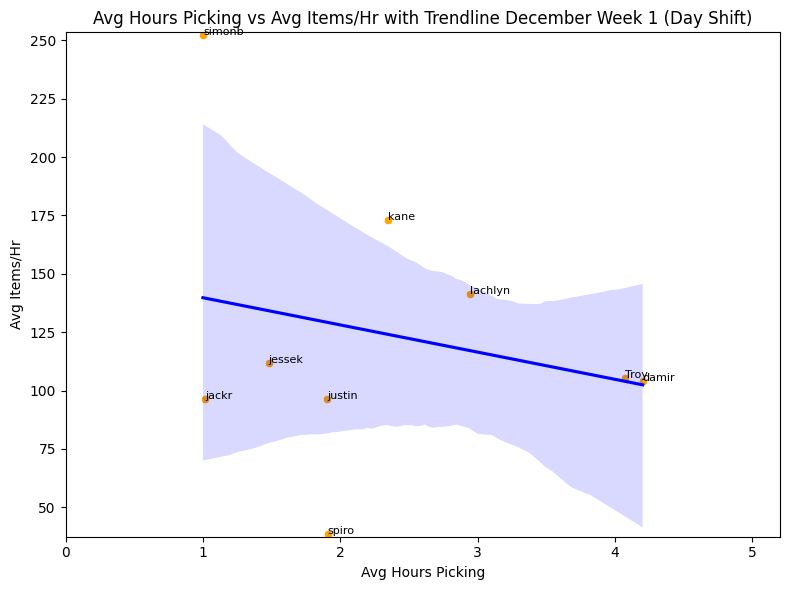

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Items/Hr'].min() - 1, df_day_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Items/Hr with Trendline December Week 1 (Day Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_802/1938647963.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



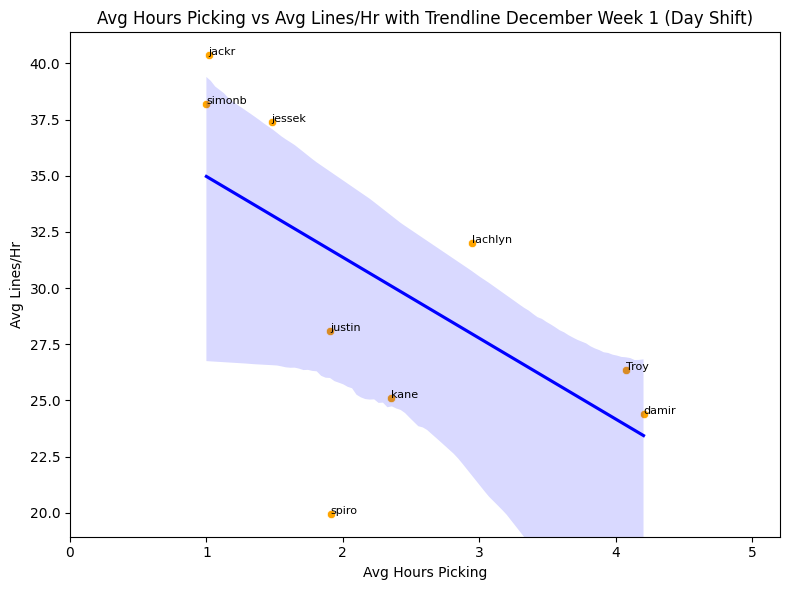

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Lines/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Lines/Hr'].min() - 1, df_day_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 1 (Day Shift)')
plt.tight_layout()
plt.show()
